# 1. Importar bibliotecas necesarias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print(f"version instalada de pandas {pd.__version__}")
print(f"version instalada de numpy {np.__version__}")
print(f"version instalada de matplotlib {plt.matplotlib.__version__}")
print(f"version instalada de seaborn {sns.__version__}")

plt.style.use('default')
sns.set_palette('husl')

version instalada de pandas 2.2.3
version instalada de numpy 2.2.5
version instalada de matplotlib 3.10.3
version instalada de seaborn 0.13.2


# 2. Creación de DF con valores perdidos

In [4]:
datos ={
    'Nombre': ['Ana','Carlos','Felipe',np.nan,'Sofia'],
    'Edad':[25,np.nan,30,28,np.nan],
    'Salario':[500,600,np.nan,550,650],
    'Departamento':['TI','Ventas',np.nan,'TI','Marketing']
}

#Crear el DF
df=pd.DataFrame(datos)
df

,Nombre,Edad,Salario,Departamento
0,Ana,25.0,500.0,TI
1,Carlos,NaN,600.0,Ventas
2,Felipe,30.0,NaN,NaN
3,NaN,28.0,550.0,TI
4,Sofia,NaN,650.0,Marketing


# 3. Explorar el DF e identificar valores perdidos

In [5]:
"""
Funciones para detectar valores perdidos:
- df.isnull().sum() = Cuenta cuántos datos perdidos hay
- df.isnull.mean() = Calcula qué % de datos está vacío
- df.notnull() = arroja donde SI hay datos
"""

print("Valores nulos en el df (df.isnull())")
print(df.isnull())

Valores nulos en el df (df.isnull())
   Nombre   Edad  Salario  Departamento
0   False  False    False         False
1   False   True    False         False
2   False  False     True          True
3    True  False    False         False
4   False   True    False         False


In [6]:
print("Conteo de valores nulos en el df (df.isnull().sum())")
print(df.isnull().sum())

Conteo de valores nulos en el df (df.isnull().sum())
Nombre          1
Edad            2
Salario         1
Departamento    1
dtype: int64


In [7]:
print("% de datos nulos en el df (df.isnull().mean())")
print(df.isnull().mean())

% de datos nulos en el df (df.isnull().mean())
Nombre          0.2
Edad            0.4
Salario         0.2
Departamento    0.2
dtype: float64


In [8]:
print("Cantidad de valores NO NULOS en el df (df.notnull().sum())")
print(df.notnull().sum())

Cantidad de valores NO NULOS en el df (df.notnull().sum())
Nombre          4
Edad            3
Salario         4
Departamento    4
dtype: int64


# 4. Visualización de valores perdidos

In [9]:
np.random.seed(42)
datos_largos = {
    'A' : np.random.choice([1,2,3,np.nan],100,p=[0.3,0.3,0.3,0.1]),
    'B' : np.random.choice([10,20,30,np.nan],100,p=[0.25,0.25,0.25,0.25]),
    'C' : np.random.choice(['X','Y','Z',np.nan],100,p=[0.4,0.3,0.2,0.1]),
}

#Genero el DF
df_largo = pd.DataFrame(datos_largos)
df_largo

,A,B,C
0,2.0,10.0,Y
1,NaN,30.0,X
2,3.0,20.0,X
3,2.0,30.0,Z
4,1.0,NaN,Y
...,...,...,...
95,2.0,20.0,Y
96,2.0,30.0,Z
97,2.0,NaN,X
98,1.0,NaN,Y


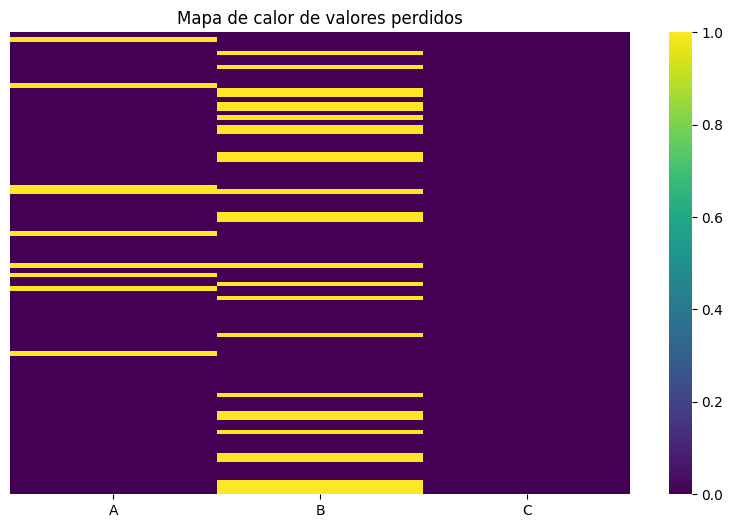

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df_largo.isnull(), cmap='viridis',cbar=True, yticklabels=False)
plt.title("Mapa de calor de valores perdidos")
plt.show()

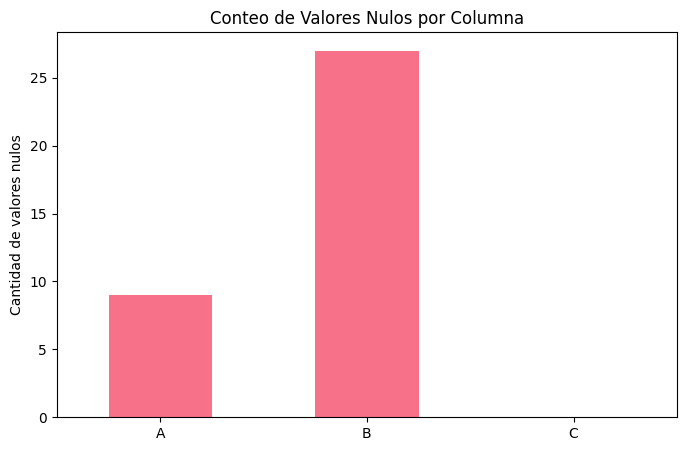

In [14]:
#Gráfico de barras de valores nulos
plt.figure(figsize=(8,5))
df_largo.isnull().sum().plot(kind='bar')
plt.title("Conteo de Valores Nulos por Columna")
plt.ylabel('Cantidad de valores nulos')
plt.xticks(rotation=0)
plt.show()

# 5. Eliminación de Datos Perdidos

In [17]:
"""
Para filtrar (limpiar) los datos vimos 2 opciones: eliminar o imputar.

En el caso de eliminar (borrar datos), se puede borrar lo incompleto de 3 maneras:
- Eliminar filas con valores perdidos > dropna()
- Eliminar columnas con valores perdidos > dropna(axis=1)
- Gestion de datos con un filtro (mantener filas con al menos 3 datos validos) > dropna(thresh=3)
"""

#Crear DF ára eliminar
df_filtrado = df.copy()
print("DataFrame original:")
df_filtrado

DataFrame original:


,Nombre,Edad,Salario,Departamento
0,Ana,25.0,500.0,TI
1,Carlos,NaN,600.0,Ventas
2,Felipe,30.0,NaN,NaN
3,NaN,28.0,550.0,TI
4,Sofia,NaN,650.0,Marketing


In [16]:
#Eliminar las filas con valores perdidos (NaN)
print("Eliminación de filas (dropna())")
df_sin_filas = df_filtrado.dropna()
df_sin_filas

Eliminación de filas (dropna())


,Nombre,Edad,Salario,Departamento
0,Ana,25.0,500.0,TI


In [18]:
#Eliminar las columnas con valores perdidos (NaN)
print("Eliminación de columnas (dropna(axis=1))")
df_sin_columnas = df_filtrado.dropna(axis=1)
df_sin_columnas

Eliminación de columnas (dropna(axis=1))


""
0
1
2
3
4


In [19]:
#Eliminación filtrado condicional - Mantener filas con al menos 3 valores NO NULOS
print("Filtrado condicional (thresh=3)")
df_thresh = df_filtrado.dropna(thresh=3)
df_thresh

Filtrado condicional (thresh=3)


,Nombre,Edad,Salario,Departamento
0,Ana,25.0,500.0,TI
1,Carlos,NaN,600.0,Ventas
3,NaN,28.0,550.0,TI
4,Sofia,NaN,650.0,Marketing


# 6. Imputación con valores estadísticos

In [20]:
"""
La otra opción es imputar los valores perdidos con datos estadísticos. En el caso de que no queramos borrar nada, se pueden reemplazar por valores como:

-Promedio(mean)
-Mediana(median)
-Moda(mode)
"""

df_imputacion = df.copy()
print("df original:")
df_imputacion

df original:


,Nombre,Edad,Salario,Departamento
0,Ana,25.0,500.0,TI
1,Carlos,NaN,600.0,Ventas
2,Felipe,30.0,NaN,NaN
3,NaN,28.0,550.0,TI
4,Sofia,NaN,650.0,Marketing


In [23]:
#Imputación con la media
print(f"media de edad: {df_imputacion['Edad'].mean():.2f}")
df_imputacion['Edad'].fillna(df_imputacion['Edad'].mean(), inplace=True)
df_imputacion

media de edad: 27.67


,Nombre,Edad,Salario,Departamento
0,Ana,25.000000,500.0,TI
1,Carlos,27.666667,600.0,Ventas
2,Felipe,30.000000,NaN,NaN
3,NaN,28.000000,550.0,TI
4,Sofia,27.666667,650.0,Marketing


In [24]:
#Imputacion con la mediana
print(f"Mediana de Salario: {df_imputacion['Salario'].median():.2f}")
df_imputacion['Salario'].fillna(df_imputacion['Salario'].median(), inplace=True)
df_imputacion

Mediana de Salario: 575.00


,Nombre,Edad,Salario,Departamento
0,Ana,25.000000,500.0,TI
1,Carlos,27.666667,600.0,Ventas
2,Felipe,30.000000,575.0,NaN
3,NaN,28.000000,550.0,TI
4,Sofia,27.666667,650.0,Marketing


In [28]:
#Imputacion con la moda
print(f"Moda de Departamento: {df_imputacion['Departamento'].mode().item()}")
df_imputacion['Departamento'].fillna(df_imputacion['Departamento'].mode().item(), inplace=True)
df_imputacion

Moda de Departamento: TI


,Nombre,Edad,Salario,Departamento
0,Ana,25.000000,500.0,TI
1,Carlos,27.666667,600.0,Ventas
2,Felipe,30.000000,575.0,TI
3,NaN,28.000000,550.0,TI
4,Sofia,27.666667,650.0,Marketing


# Actividad

In [61]:
df_actividades = pd.read_csv('Precipitaciones.csv')
df_actividades

,region,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre,anual
0,A CORUNA,240.5,293.4,31.0,80.6,149.5,108.9,44.6,21.8,96.5,154.5,100.8,214.8,1536.9
1,ALBACETE,68.1,28.0,26.2,65.3,25.4,50.0,2.0,34.5,48.0,44.8,33.1,14.1,439.5
2,ALICANTE,49.2,3.7,63.2,85.8,57.2,20.0,9.2,5.0,44.0,41.1,47.4,1.8,427.6
3,ALMERIA,56.3,5.2,35.8,43.1,38.8,16.9,10.2,1.9,17.4,27.3,32.6,3.2,288.7
4,ARABA,96.8,79.9,38.0,52.0,37.7,107.8,8.5,17.7,63.3,38.5,212.2,197.3,949.7
5,ASTURIAS,196.9,138.4,34.4,73.1,67.4,131.2,22.5,19.2,90.3,74.2,309.8,205.3,1362.7
6,AVILA,67.6,104.5,5.6,83.4,25.7,44.4,5.5,14.2,97.9,91.7,33.9,47.5,621.9
7,BADAJOZ,62.2,78.5,7.7,61.3,13.0,29.6,0.0,2.7,80.5,77.6,10.2,59.3,482.6
8,ILLES BALEARS,81.2,5.3,53.9,22.0,54.4,28.5,8.8,10.0,73.2,55.6,229.9,18.1,640.9
9,BARCELONA,26.8,28.4,16.4,72.2,26.0,42.3,18.7,25.7,76.0,40.6,72.8,2.2,448.1


In [62]:
df_actividades.shape[0]

52

## Cambiar datos "normales" de forma aleatoria a NaN con código

In [63]:
#Establecer parametros (seed fija y cantidad de NaNs que quiero)
np.random.seed(42)
num_nans = 120

"""
Link con el código generado por Gemini:
https://www.google.com/search?q=transform+random+values+to+NaN+values+in+DF+python&client=opera-gx&hs=GJL&sca_esv=94f838f05e4d962b&sxsrf=AE3TifNwuQRwuhxeih1mjT875AmntLHjSw%3A1750900447286&ei=355caLShEdjf1sQPudre0Q4&ved=0ahUKEwj0jMq59I2OAxXYr5UCHTmtN-oQ4dUDCBA&uact=5&oq=transform+random+values+to+NaN+values+in+DF+python&gs_lp=Egxnd3Mtd2l6LXNlcnAiMnRyYW5zZm9ybSByYW5kb20gdmFsdWVzIHRvIE5hTiB2YWx1ZXMgaW4gREYgcHl0aG9uMggQIRigARjDBDIIECEYoAEYwwRIgyRQuAhYyiNwAXgAkAEAmAGpAaAB5QqqAQQxNi4xuAEDyAEA-AEBmAIPoALBCMICChAAGLADGNYEGEfCAgQQIxgnwgIIEAAYgAQYogTCAggQABiiBBiJBcICBRAAGO8FwgIKECEYoAEYwwQYCpgDAIgGAZAGCJIHAjE1oAfUT7IHAjE0uAe7CMIHBjEwLjMuMsgHFA&sclient=gws-wiz-serp
"""
# Generate random row and column indices
rows = np.random.randint(0, df_actividades.shape[0], num_nans)
cols = np.random.randint(0, df_actividades.shape[1], num_nans)

for i in range(num_nans):
    df_actividades.iloc[rows[i], cols[i]] = np.nan


df_actividades.head()

,region,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre,anual
0,A CORUNA,240.5,293.4,31.0,80.6,NaN,108.9,44.6,21.8,96.5,154.5,100.8,214.8,NaN
1,ALBACETE,68.1,NaN,26.2,65.3,25.4,50.0,2.0,34.5,48.0,NaN,33.1,14.1,NaN
2,ALICANTE,49.2,3.7,NaN,85.8,57.2,20.0,NaN,5.0,44.0,41.1,47.4,1.8,427.6
3,ALMERIA,56.3,5.2,NaN,43.1,38.8,16.9,10.2,1.9,NaN,NaN,32.6,3.2,288.7
4,NaN,96.8,79.9,38.0,52.0,37.7,107.8,8.5,17.7,63.3,38.5,212.2,197.3,949.7


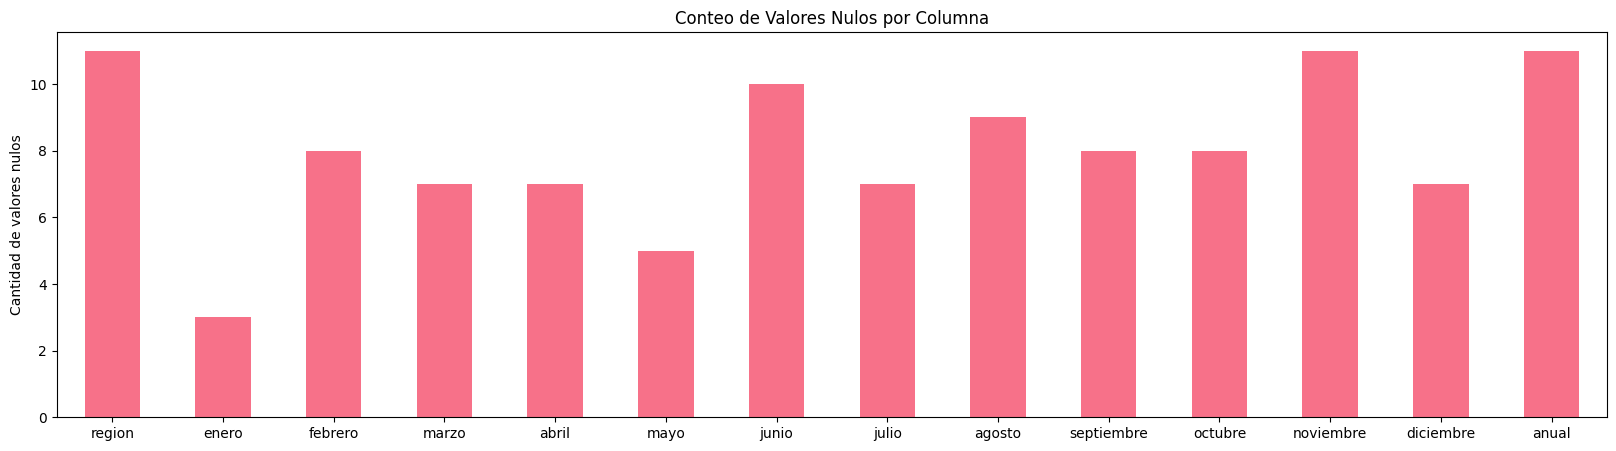

In [64]:
#Gráfico de barras de valores nulos
plt.figure(figsize=(20,5))
df_actividades.isnull().sum().plot(kind='bar')
plt.title("Conteo de Valores Nulos por Columna")
plt.ylabel('Cantidad de valores nulos')
plt.xticks(rotation=0)
plt.show()

In [65]:
#Se llenan los NaN con "?"
df_actividades.fillna("?", inplace=True)
df_actividades

,region,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre,anual
0,A CORUNA,240.5,293.4,31.0,80.6,?,108.9,44.6,21.8,96.5,154.5,100.8,214.8,?
1,ALBACETE,68.1,?,26.2,65.3,25.4,50.0,2.0,34.5,48.0,?,33.1,14.1,?
2,ALICANTE,49.2,3.7,?,85.8,57.2,20.0,?,5.0,44.0,41.1,47.4,1.8,427.6
3,ALMERIA,56.3,5.2,?,43.1,38.8,16.9,10.2,1.9,?,?,32.6,3.2,288.7
4,?,96.8,79.9,38.0,52.0,37.7,107.8,8.5,17.7,63.3,38.5,212.2,197.3,949.7
5,ASTURIAS,196.9,138.4,34.4,73.1,67.4,131.2,22.5,19.2,90.3,74.2,309.8,205.3,?
6,AVILA,67.6,104.5,5.6,83.4,25.7,44.4,5.5,?,?,91.7,33.9,47.5,?
7,BADAJOZ,?,78.5,?,61.3,13.0,29.6,?,2.7,?,77.6,10.2,59.3,?
8,ILLES BALEARS,81.2,5.3,?,22.0,54.4,?,8.8,10.0,73.2,55.6,229.9,18.1,640.9
9,?,26.8,28.4,16.4,72.2,26.0,42.3,18.7,25.7,76.0,40.6,72.8,2.2,448.1


In [66]:
#Elimina filas duplicadas y mantiene la primera de las mismas si encuentra
df_actividades.drop_duplicates(inplace=True, keep='first')
df_actividades

,region,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre,anual
0,A CORUNA,240.5,293.4,31.0,80.6,?,108.9,44.6,21.8,96.5,154.5,100.8,214.8,?
1,ALBACETE,68.1,?,26.2,65.3,25.4,50.0,2.0,34.5,48.0,?,33.1,14.1,?
2,ALICANTE,49.2,3.7,?,85.8,57.2,20.0,?,5.0,44.0,41.1,47.4,1.8,427.6
3,ALMERIA,56.3,5.2,?,43.1,38.8,16.9,10.2,1.9,?,?,32.6,3.2,288.7
4,?,96.8,79.9,38.0,52.0,37.7,107.8,8.5,17.7,63.3,38.5,212.2,197.3,949.7
5,ASTURIAS,196.9,138.4,34.4,73.1,67.4,131.2,22.5,19.2,90.3,74.2,309.8,205.3,?
6,AVILA,67.6,104.5,5.6,83.4,25.7,44.4,5.5,?,?,91.7,33.9,47.5,?
7,BADAJOZ,?,78.5,?,61.3,13.0,29.6,?,2.7,?,77.6,10.2,59.3,?
8,ILLES BALEARS,81.2,5.3,?,22.0,54.4,?,8.8,10.0,73.2,55.6,229.9,18.1,640.9
9,?,26.8,28.4,16.4,72.2,26.0,42.3,18.7,25.7,76.0,40.6,72.8,2.2,448.1


In [60]:
#Se deja el df en un csv nuevo
df_actividades.to_csv('Precipitaciones 25-06-2025.csv', sep=";",index=False, encoding='utf-8')

# Actividad 2